- 사이킥런


In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder  #데이터를 스케일,정규화


In [4]:
data1 = pd.DataFrame({'Original' : [50,80,90,100,170]})
data2 = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})

In [ ]:
## scikit-learn의 전처리기는 2차원 배열을 입력으로 요구!!
## 왜? "샘플수 x 특성수" 형태의 2차원 배열로 입력 데이터를 바란다.

# fit_transform() -> 데이터를 학습하고 변환까지 한번에 수행

# 표준화
scaler_1 = StandardScaler()
data1['scale_1'] = scaler_1.fit_transform(data1[['Original']])

# 정규화
scaler_2 = MinMaxScaler()
data1['scale_2'] = scaler_2.fit_transform(data1[['Original']])

In [6]:
data1

,Original,scale_1,scale_2
0,50,-1.209103,0.000000
1,80,-0.453413,0.250000
2,90,-0.201517,0.333333
3,100,0.050379,0.416667
4,170,1.813654,1.000000


In [ ]:
# 레이블의 인코딩
encoder_1 = LabelEncoder()
data2['Label Encoding'] = encoder_1.fit_transform(data2['Fruits'])


In [10]:
encoder_2 = OneHotEncoder(sparse_output=False)
onhot_encoded= encoder_2.fit_transform(data2[['Label Encoding']])

In [11]:
onehot_col = encoder_2.get_feature_names_out()
print(onehot_col)

['Label Encoding_0' 'Label Encoding_1' 'Label Encoding_2']


In [13]:
onehot_df = pd.DataFrame(onhot_encoded, columns = onehot_col)
print(onehot_col)

['Label Encoding_0' 'Label Encoding_1' 'Label Encoding_2']


In [14]:
onehot_df

,Label Encoding_0,Label Encoding_1,Label Encoding_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [15]:
data2 = pd.concat([data2, onehot_df], axis = 1)

### 기초통계

c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


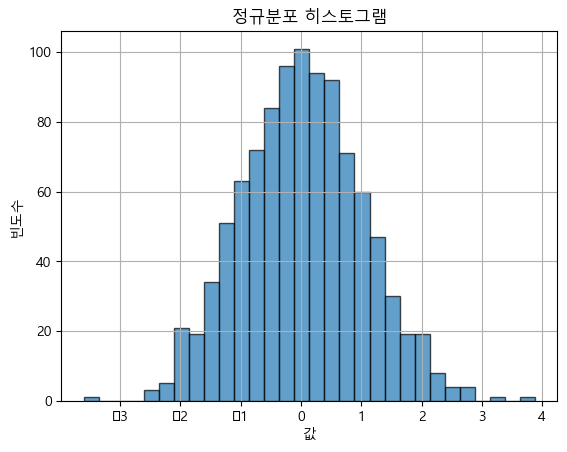

왜도 (Skewness): 0.1041
첨도 (Kurtosis): 0.0133


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis

# 정규분포 데이터 생성 (평균=0, 표준편차=1, 1000개 샘플)
data = np.random.normal(loc=0, scale=1, size=1000)

# 데이터프레임으로 변환 (선택사항)
df = pd.DataFrame(data, columns=['값'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 정규분포 히스토그램 시각화
plt.hist(df['값'], bins=30, edgecolor='black', alpha=0.7)
plt.title('정규분포 히스토그램')
plt.xlabel('값')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()

# 왜도(Skewness) 계산
skewness = skew(df['값'])
print(f"왜도 (Skewness): {skewness:.4f}")

# 첨도(Kurtosis) 계산
kurt= kurtosis(df['값'])  # Fisher 방식 (정규분포면 0이 나옴)
print(f"첨도 (Kurtosis): {kurt:.4f}")

### 데이터의 병합


In [17]:
# 고객 정보 데이터프레임
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
 })
 # 주문 정보 데이터프레임
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [1, 2, 4],
    'product': ['Laptop', 'Tablet', 'Smartphone']
})

In [18]:
print(customers)
print(orders)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
   order_id  customer_id     product
0       101            1      Laptop
1       102            2      Tablet
2       103            4  Smartphone


In [19]:
# Inner Join (공통된 customer_id로만 합침)
# 아마도 1,2 만 붙을 것 같다.
result_inner = pd.merge(customers, orders, on='customer_id', how='inner')
# Left Join (customers 데이터프레임의 모든 값 유지)
result_left = pd.merge(customers, orders, on='customer_id', how='left')
# 결과 출력
print("Inner Join:\n", result_inner)
print("\nLeft Join:\n", result_left)

Inner Join:
    customer_id   name  order_id product
0            1  Alice       101  Laptop
1            2    Bob       102  Tablet

Left Join:
    customer_id     name  order_id product
0            1    Alice     101.0  Laptop
1            2      Bob     102.0  Tablet
2            3  Charlie       NaN     NaN


In [20]:
result_right = pd.merge(customers, orders, on='customer_id', how='right')
print(result_right)

   customer_id   name  order_id     product
0            1  Alice       101      Laptop
1            2    Bob       102      Tablet
2            4    NaN       103  Smartphone
